In [1]:
import classiq

In [2]:
from classiq import *
from classiq.qmod.symbolic import logical_or
from classiq.execution import ExecutionPreferences

In [3]:
# Define the size
size = 4  #number of qubits
size_line = 2**size  #number of lines

In [4]:
#prepare qubit in |->
@qfunc
def prepare_minus(x: QBit):
    X(x)
    H(x)

#implementation of a diffuser oracle for Grover's algorithm
@qfunc
def diffuzer_oracle(aux: Output[QNum], x: QNum):
    aux ^= (x != 0)

#implementation the zero diffuser for the quantum walk
@qfunc
def zero_diffuzer(x: QNum):
    aux = QNum('aux')
    allocate(1,aux)
    within_apply(compute=lambda: prepare_minus(aux),
              action=lambda: diffuzer_oracle)

In [5]:
#coin operation for the quantum walk
def W_iteration(i: int, vertices: QNum, adjacent_vertices: QNum):
    prob = [0]*size_line #size_line=16
    if i == 0:
        prob[i + 1] = 1.0  #the first node moves to the right (1st node)
    elif i == size_line - 1:
        prob[i - 1] = 1.0  #the last node moves to the left (14th node)
    else:
        prob[i - 1] = 0.5  #probability of moving to the left
        prob[i + 1] = 0.5  #probability of moving to the right
  
    print(f'Node={i}, prob vec ={prob}')
    control(ctrl=vertices==i,
            operand=lambda: within_apply(
              compute= lambda: inplace_prepare_state(probabilities=prob, bound=0.01, target=adjacent_vertices),
              action= lambda: zero_diffuzer(adjacent_vertices)))

#apply the coin operator to all vertices
@qfunc
def W_operator(vertices: QNum, adjacent_vertices: QNum):
    for i in range(size_line):
        W_iteration(i, vertices, adjacent_vertices)

In [6]:
#oracle to check if two vertices are adjacent
@qfunc
def edge_oracle(res: Output[QBit], vertices: QNum, adjacent_vertices: QNum):
    res |= (((vertices - adjacent_vertices) == 1) | ((vertices - adjacent_vertices) == -1))

#swap the values of two QArrays bit by bit
@qfunc
def bitwise_swap(x: QArray[QBit], y: QArray[QBit]):
    repeat(count=x.len, iteration=lambda i: SWAP(x[i], y[i]))

#apply the shift operator to swap vertices with their adjacent vertices
@qfunc
def S_operator(vertices: QNum, adjacent_vertices: QNum):
    res = QNum('res')
    edge_oracle(res,vertices,adjacent_vertices)
    control(ctrl= res==1,
        operand= lambda: bitwise_swap(vertices,adjacent_vertices))

In [7]:
#main function to perform the quantum random walk
@qfunc
def main(vertices: Output[QNum], adjacent_vertices: Output[QNum]):
    allocate(size, vertices) #allocate for vertices
    hadamard_transform(vertices) #initialize superposition
    allocate(size, adjacent_vertices) #allocate for adjacent vertices
    
    W_operator(vertices, adjacent_vertices) #coin operator
    S_operator(vertices, adjacent_vertices) #shift operator


In [8]:
#create & synthesize the quantum model
qmod = create_model(main)
qprog = synthesize(qmod)
show(qprog)

Node=0, prob vec =[0, 1.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Node=1, prob vec =[0.5, 0, 0.5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Node=2, prob vec =[0, 0.5, 0, 0.5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Node=3, prob vec =[0, 0, 0.5, 0, 0.5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Node=4, prob vec =[0, 0, 0, 0.5, 0, 0.5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Node=5, prob vec =[0, 0, 0, 0, 0.5, 0, 0.5, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Node=6, prob vec =[0, 0, 0, 0, 0, 0.5, 0, 0.5, 0, 0, 0, 0, 0, 0, 0, 0]
Node=7, prob vec =[0, 0, 0, 0, 0, 0, 0.5, 0, 0.5, 0, 0, 0, 0, 0, 0, 0]
Node=8, prob vec =[0, 0, 0, 0, 0, 0, 0, 0.5, 0, 0.5, 0, 0, 0, 0, 0, 0]
Node=9, prob vec =[0, 0, 0, 0, 0, 0, 0, 0, 0.5, 0, 0.5, 0, 0, 0, 0, 0]
Node=10, prob vec =[0, 0, 0, 0, 0, 0, 0, 0, 0, 0.5, 0, 0.5, 0, 0, 0, 0]
Node=11, prob vec =[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.5, 0, 0.5, 0, 0, 0]
Node=12, prob vec =[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.5, 0, 0.5, 0, 0]
Node=13, prob vec =[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.5, 0, 0.5, 0]
Node

In [1]:
from IPython.display import Image

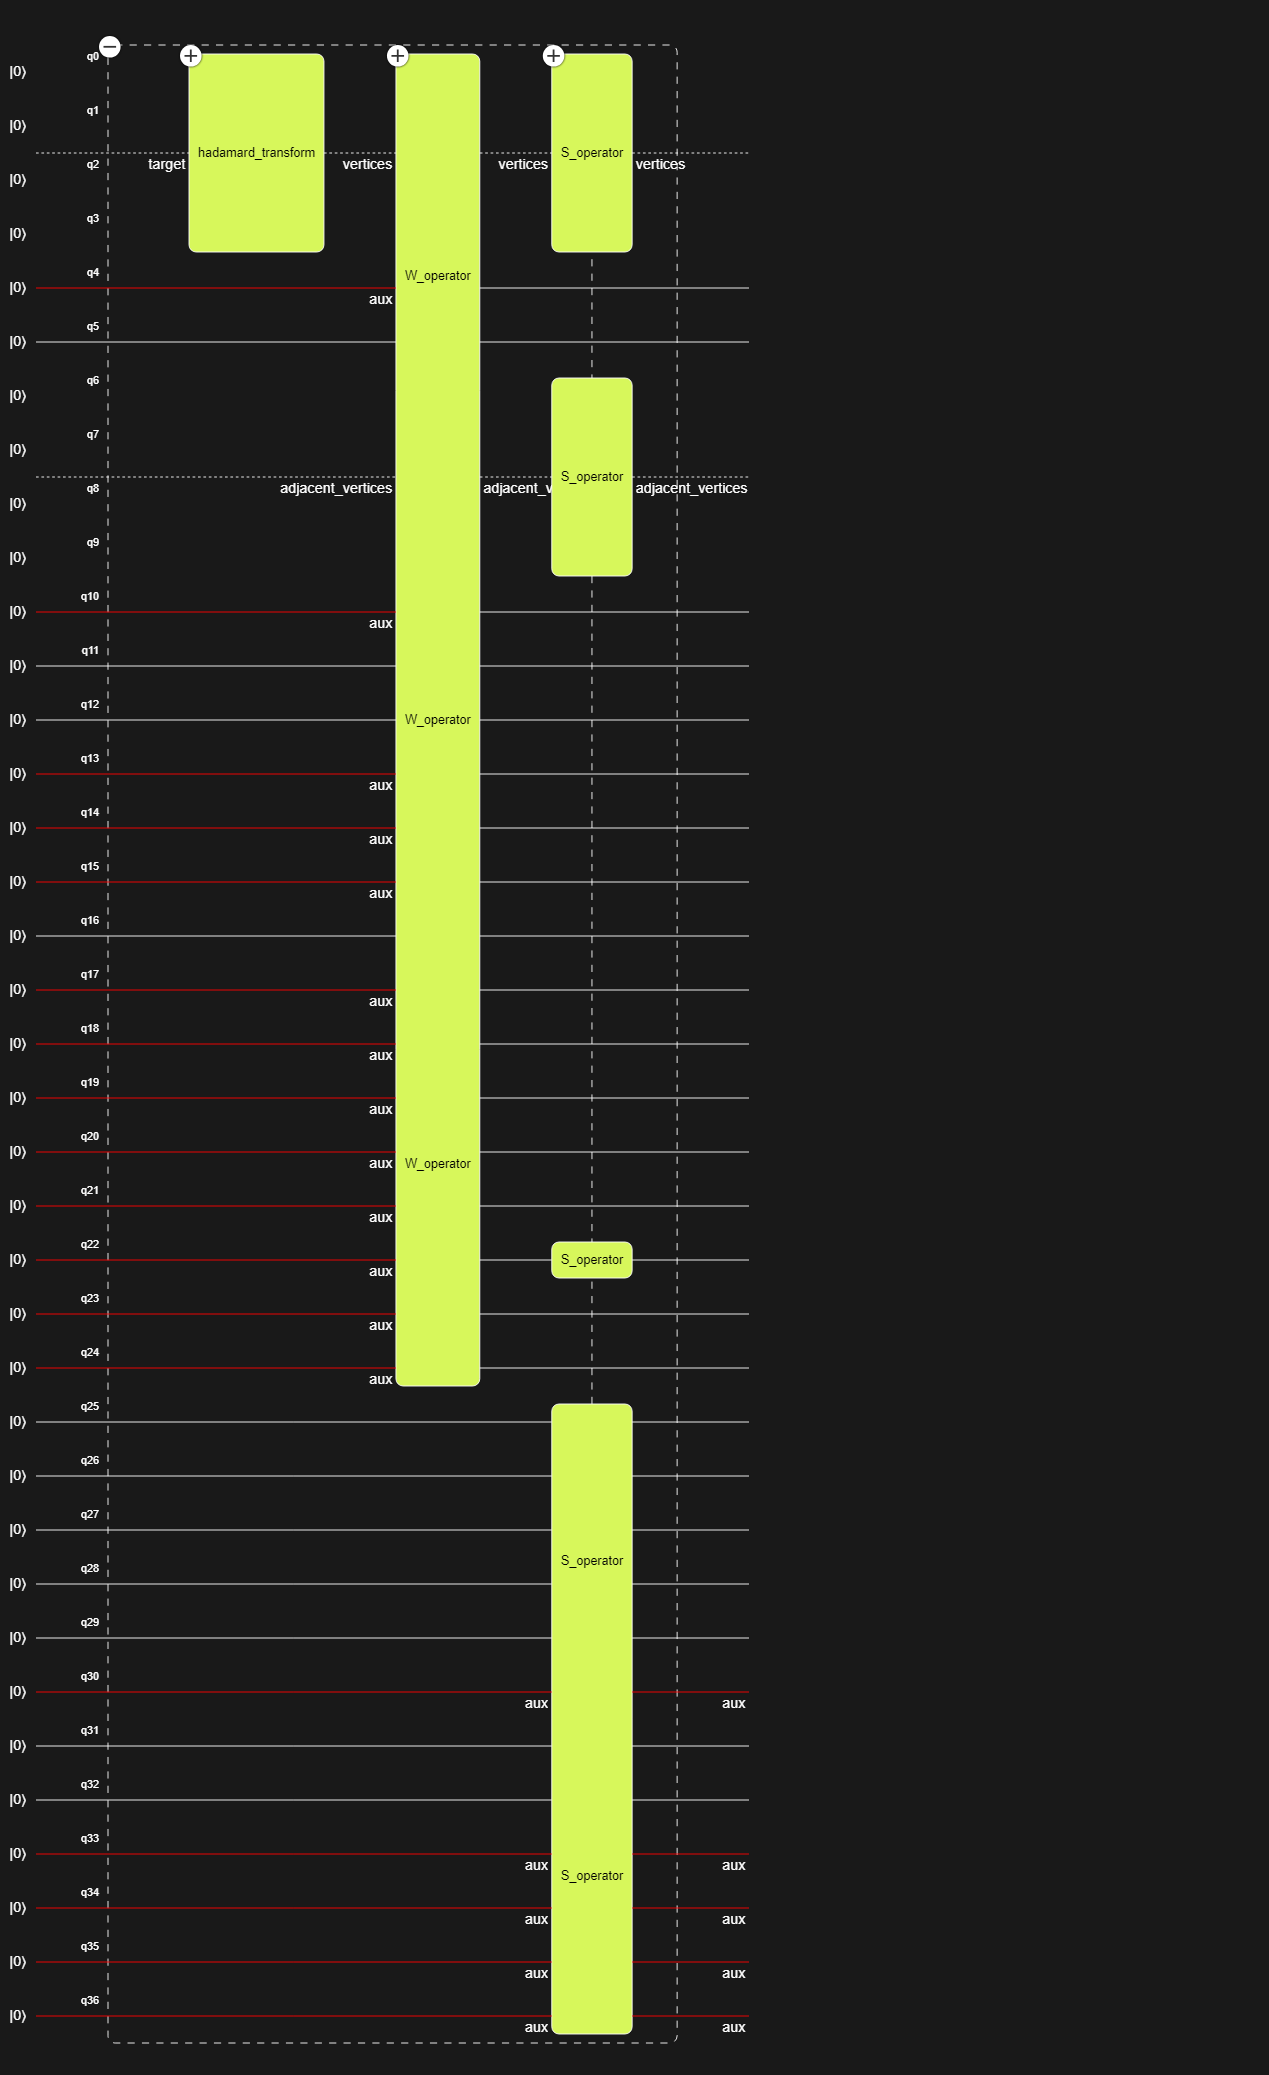

In [2]:
Image("C:/Users/MAC/Downloads/hw4.jpg")